<a href="https://colab.research.google.com/github/ajipermadi15/Allure-AI-Data-Science-Evaluation-Exercise/blob/main/Create_a_Data_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Create a Data Dashboard**

## **Import Library and Data**

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodread.

Features:


1.   **Name**$\hspace{13mm}$: Name of the book
2.   **Author**$\hspace{11mm}$: The author of the book
3.   **User Rating**$\hspace{2mm}$: Amazon users rating
4.   **Reviews**$\hspace{8.5mm}$:Number of written reviews on amazon
5.   **Price**$\hspace{14.2mm}$: The price of the book
6.   **Year**$\hspace{15.5mm}$: The year(s) it ranked on the bestseller
7.   **Genre**$\hspace{12.7mm}$: Whether fiction or non-fiction

Data taken from [Kaggle](https://https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019).



In [1]:
#@title **Import Library and Data**

#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import Data
url = "https://raw.githubusercontent.com/ajipermadi15/Allure-AI-Data-Science-Evaluation-Exercise/main/bestsellers%20with%20categories.csv"
dataset = pd.read_csv(url)

In [2]:
#@title **Show the First Five Data**

dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## **Check Dataset**

Check null values, duplicate data, data descriptions, and misspelling.

In [3]:
#@title **Check Null Values in Dataset**
for column in dataset.columns:
  print('There is {} null data in {}'.format(dataset[column].isna().sum(), column))

There is 0 null data in Name
There is 0 null data in Author
There is 0 null data in User Rating
There is 0 null data in Reviews
There is 0 null data in Price
There is 0 null data in Year
There is 0 null data in Genre


In [4]:
#@title **Check Duplicates**
from pandas.api.types import is_string_dtype

# Make a list for non-numerical columns
non_num = []
for column in dataset.columns:
  if is_string_dtype(dataset[column]) == True:
    non_num.append(column)

# Check Duplicated Data
for column in non_num:
  if dataset[column].duplicated().any() == True:
    print('there is duplicate data in the {} column'.format(column))

there is duplicate data in the Name column
there is duplicate data in the Author column
there is duplicate data in the Genre column


In [5]:
#@title **Show Data Description**

dataset.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
#@title **Check Misspelling**

dataset.Author.sort_values().unique()

There are two misspelling:
1. **George R. R. Martin** who was supposed to be **George R.R. Martin**
2. **J. K. Rowling** who was supposed to be **J.K. Rowling**

## **5 Books with the Highest Frequency of Bestselling**

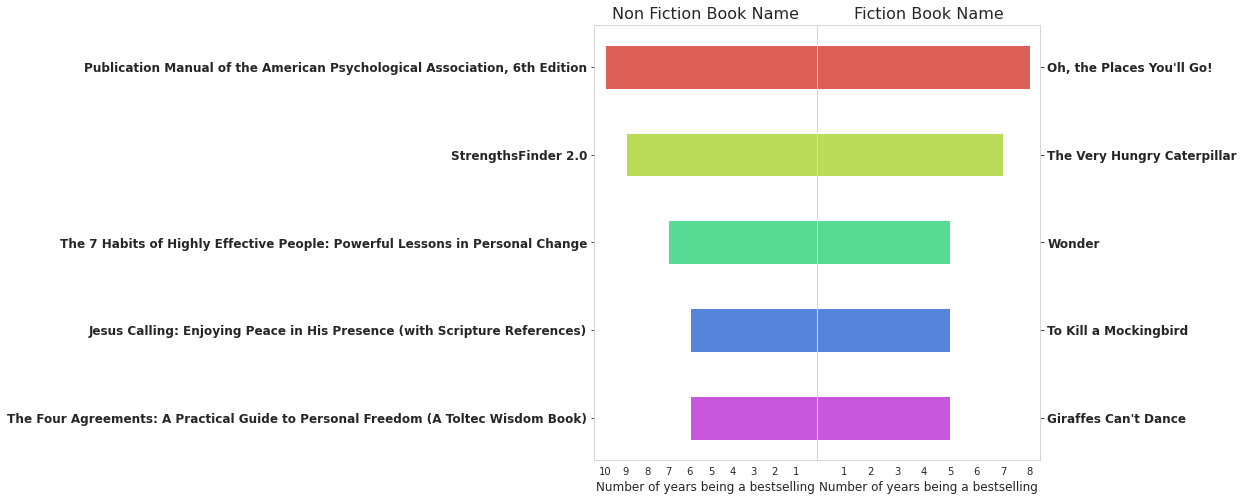

In [7]:
#@title **Visualizing**

best_nf_books = dataset.groupby(['Name', 'Genre']).count().unstack()['Author']['Non Fiction'].sort_values(ascending=False).head()
best_f_books = dataset.groupby(['Name', 'Genre']).count().unstack()['Author']['Fiction'].sort_values(ascending=False).head()

color=sns.color_palette('hls', 5)

sns.set_style('whitegrid')

fig, axes = plt.subplots(1,2,figsize=(8,8))
plt.subplots_adjust(wspace=0)

axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_left()
axes[0].grid(None)
axes[0].set_xticks(range(1,int(best_nf_books.values.max())+1))
axes[0].barh(y=best_nf_books.index,width=best_nf_books.values,height=0.5,tick_label=best_nf_books.index,color=color)
axes[0].set_yticklabels(best_nf_books.index,fontweight='semibold',fontsize=12)
axes[0].set_title('Non Fiction Book Name',fontdict={'size':16})
axes[0].set_xlabel('Number of years being a bestselling', fontsize=12)

axes[1].set_xticks(range(1,int(best_f_books.values.max())+1))
axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].grid(None)
axes[1].barh(y=best_f_books.index,width=best_f_books.values,height=0.5,tick_label=best_f_books.index,color=color)
axes[1].set_yticklabels(best_f_books.index,fontweight='semibold',fontsize=12)
axes[1].set_title('Fiction Book Name',fontdict={'size':16})
axes[1].set_xlabel('Number of years being a bestselling',fontsize=12)

plt.show()

## **Many Bestselling Books by Genre Each Year**

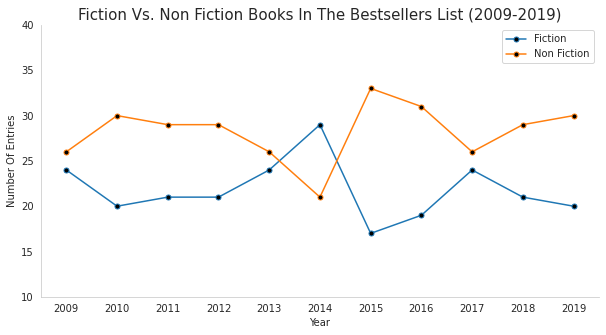

In [8]:
#@title **Visualizing**
books = dataset.groupby(['Year','Genre']).count().unstack()['Name']

fig,axes=plt.subplots(1,1,figsize=(10,5))
sns.set_style('white')
axes.plot(books,markersize=5,markerfacecolor='black',marker='o')
axes.set_xlabel('Year')
axes.set_ylabel('Number Of Entries')
axes.set_xticks(books.index)
axes.set_ylim(10,40)
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.legend(books)
axes.set_title('Fiction Vs. Non Fiction Books In The Bestsellers List (2009-2019)',fontdict={'size':15})
plt.grid(0)

plt.show()

## **Data Cleaning**

Before the data can be processed further, there will be a rows drop in the book with the same name (duplication) and fixing the misspelling.
Data cleaning has just been carried out because to search for **5 books with the highest frequency of bestsellers** and **Many Bestselling Books by Genre Each Year**, data with duplicate names is still needed (different in years).

In [9]:
#@title **Drop Data with Duplicate Name**

dataset = dataset.drop_duplicates('Name', keep='last')

In [10]:
#@title **Fixing Misspelling**

dataset = dataset.replace('George R. R. Martin', 'George R.R. Martin')
dataset = dataset.replace('J. K. Rowling', 'J.K. Rowling')

## **Visualizing Data**

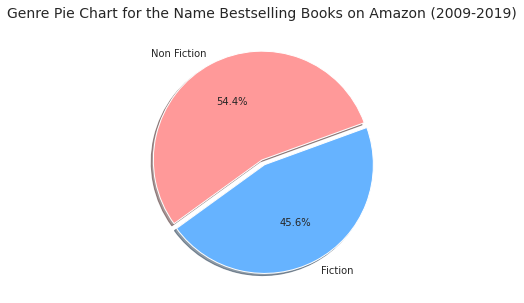

In [11]:
#@title **Genre Proportions with Pie Chart**


plt.figure(figsize=(5,5))
plt.pie(dataset['Genre'].value_counts(), explode = [0, 0.05], labels=['Non Fiction','Fiction'], autopct='%.1f%%', shadow=True, startangle=20, colors = ['#ff9999','#66b3ff'])
plt.title('Genre Pie Chart for the Name Bestselling Books on Amazon (2009-2019)',fontdict={'size':14}, y = 1);

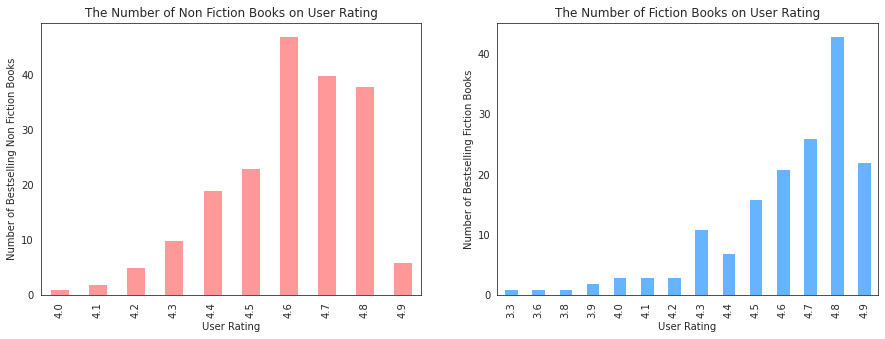

In [12]:
#@title **Bar Plot for the Number of Books with a Certain User Rating in Each Genre**
import numpy as np

ur_nf_books = dataset.groupby(['Name', 'Genre']).sum().unstack()['User Rating']['Non Fiction'].sort_values().value_counts()
ur_f_books = dataset.groupby(['Name', 'Genre']).sum().unstack()['User Rating']['Fiction'].sort_values().value_counts()

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ur_nf_books.sort_index().plot(ax = axes[0], kind = 'bar', color = '#ff9999', title = 'The Number of Non Fiction Books on User Rating', xlabel = 'User Rating', ylabel = 'Number of Bestselling Non Fiction Books')
ur_f_books.sort_index().plot(ax = axes[1], kind = 'bar', color = '#66b3ff', title = 'The Number of Fiction Books on User Rating', xlabel = 'User Rating', ylabel = 'Number of Bestselling Fiction Books')

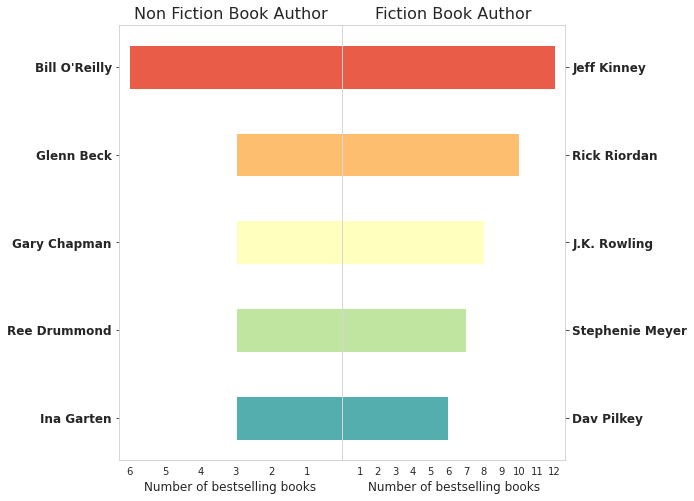

In [13]:
#@title **Best Author Based on the Most Bestselling Books**

bestaut_nf_books = dataset.groupby(['Author', 'Genre']).count().unstack()['Name']['Non Fiction'].sort_values(ascending = False).head()
bestaut_f_books = dataset.groupby(['Author', 'Genre']).count().unstack()['Name']['Fiction'].sort_values(ascending = False).head()

color=sns.color_palette('Spectral', 5)

sns.set_style('whitegrid')

fig, axes = plt.subplots(1,2,figsize=(8,8))
plt.subplots_adjust(wspace=0)

axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_left()
axes[0].grid(None)
axes[0].set_xticks(range(1,int(bestaut_nf_books.values.max())+1))
axes[0].barh(y=bestaut_nf_books.index,width=bestaut_nf_books.values,height=0.5,tick_label=bestaut_nf_books.index,color=color)
axes[0].set_yticklabels(bestaut_nf_books.index,fontweight='semibold',fontsize=12)
axes[0].set_title('Non Fiction Book Author',fontdict={'size':16})
axes[0].set_xlabel('Number of bestselling books', fontsize=12)

axes[1].set_xticks(range(1,int(bestaut_f_books.values.max())+1))
axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].grid(None)
axes[1].barh(y=bestaut_f_books.index,width=bestaut_f_books.values,height=0.5,tick_label=bestaut_f_books.index,color=color)
axes[1].set_yticklabels(bestaut_f_books.index,fontweight='semibold',fontsize=12)
axes[1].set_title('Fiction Book Author',fontdict={'size':16})
axes[1].set_xlabel('Number of bestselling books',fontsize=12)

plt.show()

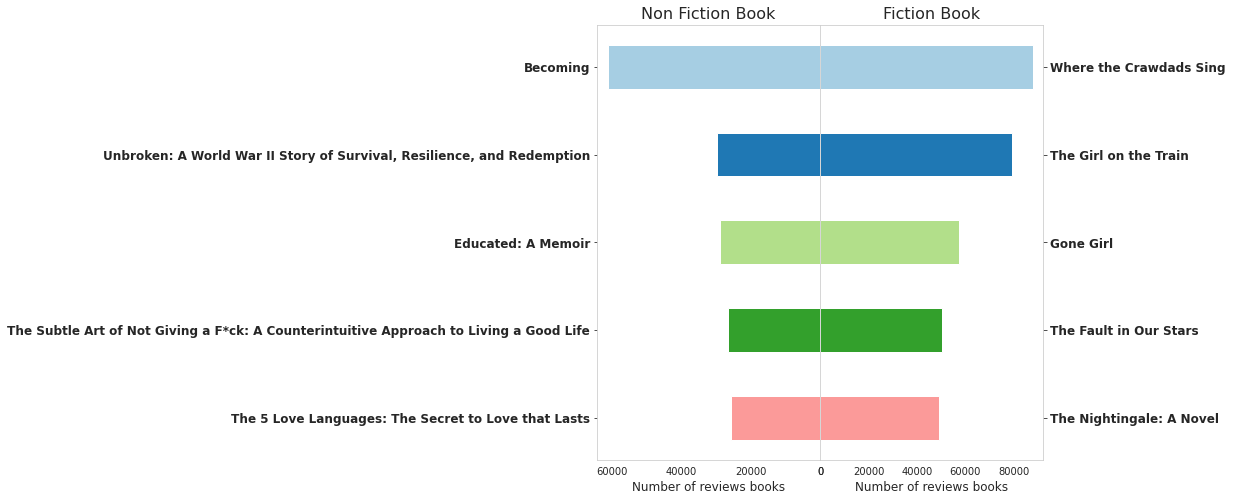

In [14]:
#@title **Best Book Based on Number of the Reviews**

bestboo_nf_books = dataset.groupby(['Name', 'Genre']).sum().unstack()['Reviews']['Non Fiction'].sort_values(ascending = False).head()
bestboo_f_books = dataset.groupby(['Name', 'Genre']).sum().unstack()['Reviews']['Fiction'].sort_values(ascending = False).head()

color=sns.color_palette("Paired", 5)

sns.set_style('whitegrid')

fig, axes = plt.subplots(1,2,figsize=(8,8))
plt.subplots_adjust(wspace=0)

axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_left()
axes[0].grid(None)
axes[0].set_xticks(range(0,int(bestboo_nf_books.values.max())+1,20000))
axes[0].barh(y=bestboo_nf_books.index,width=bestboo_nf_books.values,height=0.5,tick_label=bestboo_nf_books.index,color=color)
axes[0].set_yticklabels(bestboo_nf_books.index,fontweight='semibold',fontsize=12)
axes[0].set_title('Non Fiction Book',fontdict={'size':16})
axes[0].set_xlabel('Number of reviews books', fontsize=12)

axes[1].set_xticks(range(0,int(bestboo_f_books.values.max())+1,20000))
axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].grid(None)
axes[1].barh(y=bestboo_f_books.index,width=bestboo_f_books.values,height=0.5,tick_label=bestboo_f_books.index,color=color)
axes[1].set_yticklabels(bestboo_f_books.index,fontweight='semibold',fontsize=12)
axes[1].set_title('Fiction Book',fontdict={'size':16})
axes[1].set_xlabel('Number of reviews books',fontsize=12)

plt.show()

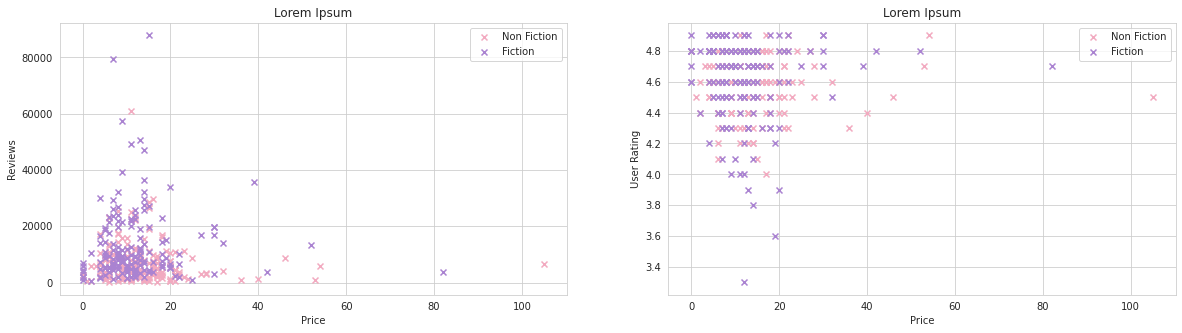

In [15]:
#@title **Scatter Plot Price - Reviews and Price - User Rating**
Price_f = dataset[dataset['Genre'] == 'Fiction'].sort_values(by='Price')['Price'].values
Price_nf = dataset[dataset['Genre'] == 'Non Fiction'].sort_values(by='Price')['Price'].values
Reviews_f = dataset[dataset['Genre'] == 'Fiction'].sort_values(by='Price')['Reviews'].values
Reviews_nf = dataset[dataset['Genre'] == 'Non Fiction'].sort_values(by='Price')['Reviews'].values
UserRating_f = dataset[dataset['Genre'] == 'Fiction'].sort_values(by='Price')['User Rating'].values
UserRating_nf = dataset[dataset['Genre'] == 'Non Fiction'].sort_values(by='Price')['User Rating'].values
figure, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].scatter(Price_nf, Reviews_nf, marker='x', color ='#F2AAC0')
ax[0].scatter(Price_f, Reviews_f, marker='x', color ='#AA83D1')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Reviews')
ax[0].set_title('Lorem Ipsum')
ax[0].legend(['Non Fiction', 'Fiction'])

ax[1].scatter(Price_nf, UserRating_nf, marker='x', color ='#F2AAC0')
ax[1].scatter(Price_f, UserRating_f, marker='x', color ='#AA83D1')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('User Rating')
ax[1].set_title('Lorem Ipsum')
ax[1].legend(['Non Fiction', 'Fiction'])

In [16]:
#@title **Correlation Table**
dataset.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.056105,-0.025012,0.237591
Reviews,-0.056105,1.000000,-0.040079,0.317818
Price,-0.025012,-0.040079,1.000000,-0.128949
Year,0.237591,0.317818,-0.128949,1.000000


From scatter plot and correlation table, we can conclude than there is no correlation between User Rating, Reviews, and Price